In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Watches_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Software_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_PC_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Music_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Video_DVD_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Beauty_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Mobile_Electronics_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Shoes_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Apparel_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Tools_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Digital_Video_Games_v1_00.tsv
/kaggle/input/amazon-us-customer-reviews-dataset/am

In [2]:
import pandas as pd

file_path = '/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Musical_Instruments_v1_00.tsv'

df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')



In [3]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,45610553,RMDCHWD0Y5OZ9,B00HH62VB6,618218723,AGPtek® 10 Isolated Output 9V 12V 18V Guitar P...,Musical Instruments,3,0,1,N,N,Three Stars,"Works very good, but induces ALOT of noise.",2015-08-31
1,US,14640079,RZSL0BALIYUNU,B003LRN53I,986692292,Sennheiser HD203 Closed-Back DJ Headphones,Musical Instruments,5,0,0,N,Y,Five Stars,Nice headphones at a reasonable price.,2015-08-31
2,US,6111003,RIZR67JKUDBI0,B0006VMBHI,603261968,AudioQuest LP record clean brush,Musical Instruments,3,0,1,N,Y,Three Stars,removes dust. does not clean,2015-08-31
3,US,1546619,R27HL570VNL85F,B002B55TRG,575084461,Hohner Inc. 560BX-BF Special Twenty Harmonica,Musical Instruments,5,0,0,N,Y,I purchase these for a friend in return for pl...,I purchase these for a friend in return for pl...,2015-08-31
4,US,12222213,R34EBU9QDWJ1GD,B00N1YPXW2,165236328,Blue Yeti USB Microphone - Blackout Edition,Musical Instruments,5,0,0,N,Y,Five Stars,This is an awesome mic!,2015-08-31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904004 entries, 0 to 904003
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        904004 non-null  object
 1   customer_id        904004 non-null  int64 
 2   review_id          904004 non-null  object
 3   product_id         904004 non-null  object
 4   product_parent     904004 non-null  int64 
 5   product_title      904003 non-null  object
 6   product_category   904004 non-null  object
 7   star_rating        904004 non-null  int64 
 8   helpful_votes      904004 non-null  int64 
 9   total_votes        904004 non-null  int64 
 10  vine               904004 non-null  object
 11  verified_purchase  904004 non-null  object
 12  review_headline    903998 non-null  object
 13  review_body        903941 non-null  object
 14  review_date        903996 non-null  object
dtypes: int64(5), object(10)
memory usage: 103.5+ MB


In [5]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,9.040040e+05,9.040040e+05,904004.000000,904004.000000,904004.000000
mean,2.732998e+07,4.947593e+08,4.251045,1.862232,2.385869
std,1.551727e+07,2.887905e+08,1.216422,13.084428,13.891941
min,1.011300e+04,2.765700e+04,1.000000,0.000000,0.000000
25%,1.403699e+07,2.377766e+08,4.000000,0.000000,0.000000
50%,2.580934e+07,4.915932e+08,5.000000,0.000000,0.000000
75%,4.190775e+07,7.452023e+08,5.000000,1.000000,2.000000
max,5.309656e+07,9.999951e+08,5.000000,4709.000000,4805.000000


In [6]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


product_title       1
review_headline     6
review_body        63
review_date         8
dtype: int64


In [7]:
print(df.duplicated().sum())


0


In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f'{col} value counts:')
    print(df[col].value_counts())
    print('\n')


marketplace value counts:
marketplace
US    904004
Name: count, dtype: int64


review_id value counts:
review_id
R2XJJXFZOM36V5    1
RMDCHWD0Y5OZ9     1
RZSL0BALIYUNU     1
RIZR67JKUDBI0     1
R18E50DDEV7FGJ    1
                 ..
R3GYQ5W8JHP8SB    1
R30SHYQXGG5EYC    1
R14YLXA56NP51I    1
R1ZH0HSH38IOTZ    1
R3H53KLLC210XI    1
Name: count, Length: 904004, dtype: int64


product_id value counts:
product_id
B003VWJ2K8    3158
B000ULAP4U    2917
B003LPTAYI    2554
B00007E7C8    2451
B000AJIF4E    2216
              ... 
B00IU35G62       1
B00EX1HNI4       1
B00IIEJOE8       1
B00OET2K2Y       1
B00006343F       1
Name: count, Length: 123284, dtype: int64


product_title value counts:
product_title
Audio-Technica ATH Professional Studio Monitor Headphones                            4811
Snark SN-1 Tuner                                                                     3158
Blue Yeti USB Microphone - Blackout Edition                                          2631
Sennheiser HD 202 II P

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [11]:
print(df[['star_rating', 'helpful_votes']].describe())


         star_rating  helpful_votes
count  904004.000000  904004.000000
mean        4.251045       1.862232
std         1.216422      13.084428
min         1.000000       0.000000
25%         4.000000       0.000000
50%         5.000000       0.000000
75%         5.000000       1.000000
max         5.000000    4709.000000


In [12]:
missing_values = df[['review_headline', 'review_body', 'helpful_votes', 'star_rating']].isnull().sum()
print(missing_values[missing_values > 0])


review_headline     6
review_body        63
dtype: int64


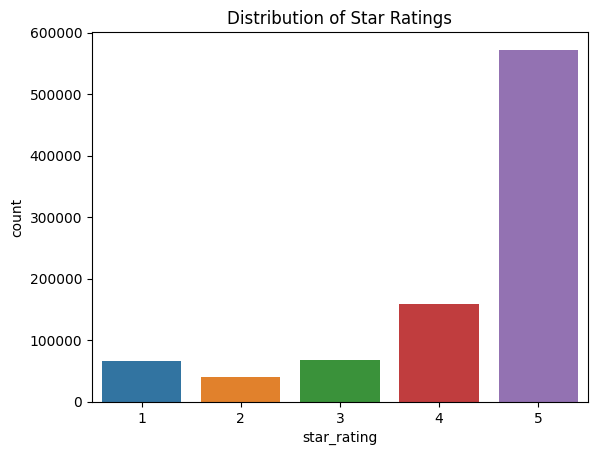

In [13]:
sns.countplot(data=df, x='star_rating')
plt.title('Distribution of Star Ratings')
plt.show()


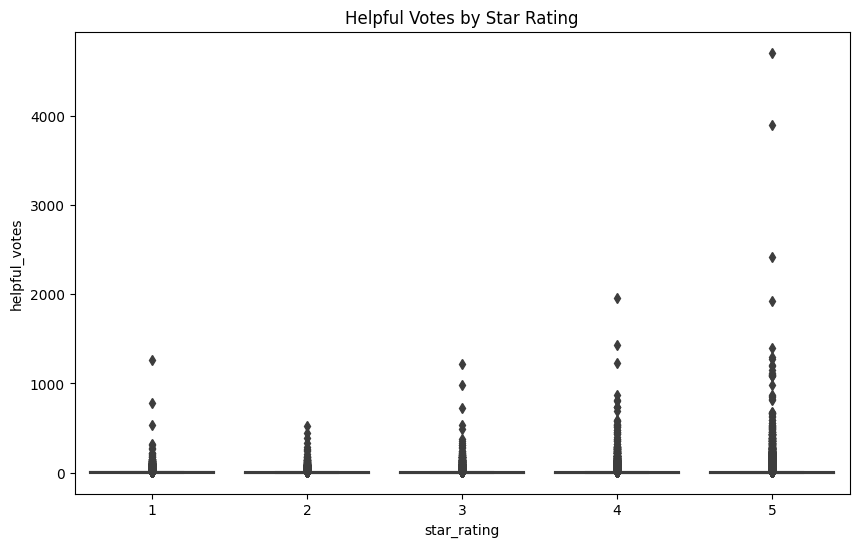

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='star_rating', y='helpful_votes')
plt.title('Helpful Votes by Star Rating')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


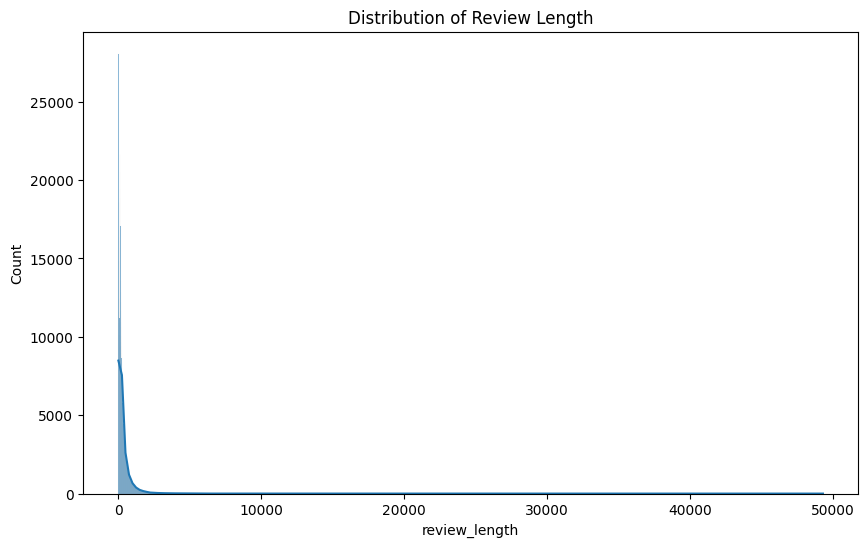

In [15]:
df['review_length'] = df['review_body'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True)
plt.title('Distribution of Review Length')
plt.show()


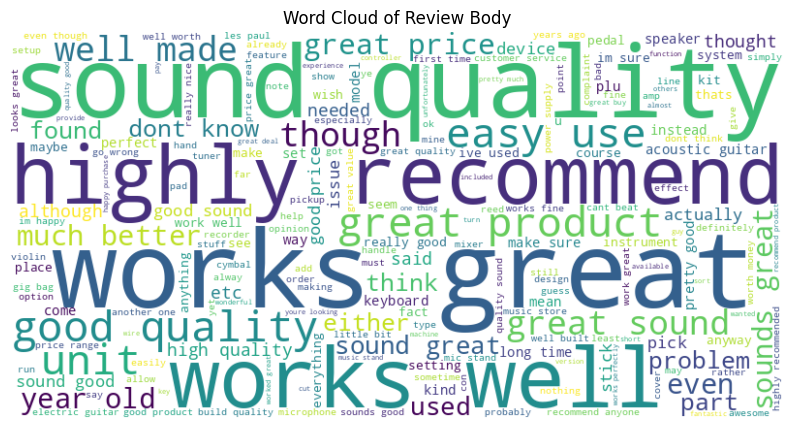

In [48]:
from wordcloud import WordCloud

text = ' '.join(df['review_body'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Body')
plt.show()


In [17]:
def sentiment_label(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['star_rating'].apply(sentiment_label)


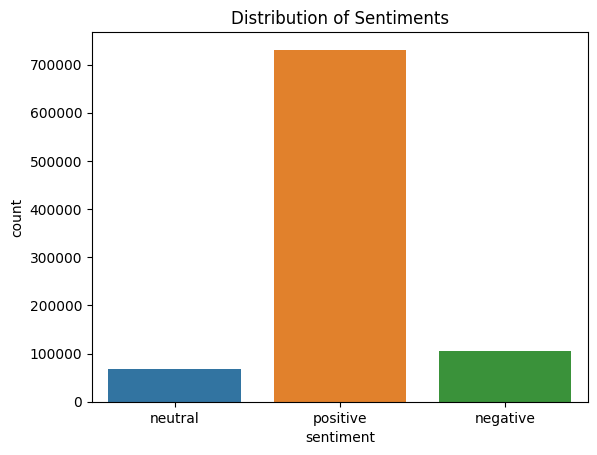

In [18]:
sns.countplot(data=df, x='sentiment')
plt.title('Distribution of Sentiments')
plt.show()


In [19]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))




In [20]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Fill missing values with empty string
df['review_headline'] = df['review_headline'].fillna('')
df['review_body'] = df['review_body'].fillna('')

# Apply text preprocessing
df['review_headline'] = df['review_headline'].apply(preprocess_text)
df['review_body'] = df['review_body'].apply(preprocess_text)

# Combine headline and body
df['review_text'] = df['review_headline'] + ' ' + df['review_body']

print(df[['review_headline', 'review_body', 'review_text']].head())

                  review_headline  \
0                     three stars   
1                      five stars   
2                     three stars   
3  purchase friend return playing   
4                      five stars   

                                         review_body  \
0                      works good induces alot noise   
1                   nice headphones reasonable price   
2                                 removes dust clean   
3  purchase friend return playing father folks lo...   
4                                        awesome mic   

                                         review_text  
0          three stars works good induces alot noise  
1        five stars nice headphones reasonable price  
2                     three stars removes dust clean  
3  purchase friend return playing purchase friend...  
4                             five stars awesome mic  


In [21]:
df['review_text'] = df['review_headline'] + ' ' + df['review_body']


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['review_text'])


In [23]:
y = df['sentiment']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X_train.shape

(723203, 10000)

In [27]:
X_test.shape

(180801, 10000)

In [31]:
X_train[1]

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 44 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.79      0.75      0.77     21211
     neutral       0.61      0.28      0.39     13400
    positive       0.93      0.98      0.95    146190

    accuracy                           0.90    180801
   macro avg       0.78      0.67      0.70    180801
weighted avg       0.89      0.90      0.89    180801



In [35]:
# Convert labels to numeric values
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y_train_numeric = y_train.map(label_mapping)
y_test_numeric = y_test.map(label_mapping)

# Train the XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
xgb_model.fit(X_train, y_train_numeric)
xgb_pred_numeric = xgb_model.predict(X_test)

# Convert numeric predictions back to original labels
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
xgb_pred = pd.Series(xgb_pred_numeric).map(reverse_label_mapping)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))


XGBoost Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.63      0.71     21211
     neutral       0.70      0.23      0.35     13400
    positive       0.90      0.99      0.94    146190

    accuracy                           0.89    180801
   macro avg       0.81      0.61      0.67    180801
weighted avg       0.88      0.89      0.87    180801



In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import lightgbm as lgb

In [39]:
# AdaBoost
print("Training AdaBoost...")
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X_train, y_train_numeric)
ada_pred_numeric = ada_model.predict(X_test)
ada_pred = pd.Series(ada_pred_numeric).map(reverse_label_mapping)
print("AdaBoost Classification Report:")
print(classification_report(y_test, ada_pred))

Training AdaBoost...
AdaBoost Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.60      0.66     21211
     neutral       0.62      0.22      0.32     13400
    positive       0.90      0.98      0.93    146190

    accuracy                           0.88    180801
   macro avg       0.75      0.60      0.64    180801
weighted avg       0.86      0.88      0.86    180801



In [38]:
# LightGBM
print("Training LightGBM...")
lgb_model = lgb.LGBMClassifier(n_estimators=100, n_jobs=-1)
lgb_model.fit(X_train, y_train_numeric)
lgb_pred_numeric = lgb_model.predict(X_test)
lgb_pred = pd.Series(lgb_pred_numeric).map(reverse_label_mapping)
print("LightGBM Classification Report:")
print(classification_report(y_test, lgb_pred))

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 73.157686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 740545
[LightGBM] [Info] Number of data points in the train set: 723203, number of used features: 10000
[LightGBM] [Info] Start training from score -2.141298
[LightGBM] [Info] Start training from score -2.602327
[LightGBM] [Info] Start training from score -0.212702
LightGBM Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.67      0.73     21211
     neutral       0.67      0.25      0.36     13400
    positive       0.91      0.98      0.95    146190

    accuracy                           0.89    180801
   macro avg       0.79      0.63      0.68    180801
weighted avg       0.88      0.89      0.88    180801



In [46]:
from sklearn.neural_network import MLPClassifier

# Initialize the model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.0001, solver='adam', random_state=42)

# Train the model
mlp_model.fit(X_train, y_train_numeric)

# Make predictions
mlp_pred_numeric = mlp_model.predict(X_test)
mlp_pred = pd.Series(mlp_pred_numeric).map(reverse_label_mapping)

# Evaluate the model
print("MLPClassifier Classification Report:")
print(classification_report(y_test, mlp_pred))


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.77      0.77     21211
     neutral       0.54      0.32      0.40     13400
    positive       0.94      0.97      0.95    146190

    accuracy                           0.90    180801
   macro avg       0.75      0.69      0.71    180801
weighted avg       0.89      0.90      0.89    180801



In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Assuming these are your stored predictions and true labels
predictions = {
    'Logistic Regression': y_pred,
    'LightGBM': lgb_pred,
    'AdaBoost': ada_pred,
    'XGBoost': xgb_pred,
    'MLPClassifier': mlp_pred
}

y_true = y_test  # Assuming y_test contains the true labels

# Create a function to extract classification report as DataFrame
def get_classification_report_df(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose().reset_index()
    df = df.rename(columns={'index': 'class'})
    df['model'] = model_name
    # Separate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    df_accuracy = pd.DataFrame({
        'class': ['accuracy'],
        'precision': [accuracy],
        'recall': [accuracy],
        'f1-score': [accuracy],
        'support': [len(y_true)],
        'model': [model_name]
    })
    return df[df['class'].isin(['negative', 'neutral', 'positive'])], df_accuracy

# Generate a combined DataFrame for all models
dfs = []
accuracy_dfs = []
for model_name, y_pred in predictions.items():
    df, df_accuracy = get_classification_report_df(y_true, y_pred, model_name)
    dfs.append(df)
    accuracy_dfs.append(df_accuracy)

combined_df = pd.concat(dfs)
accuracy_df = pd.concat(accuracy_dfs)

# Plotting the class-specific metrics
metrics = ['precision', 'recall', 'f1-score']



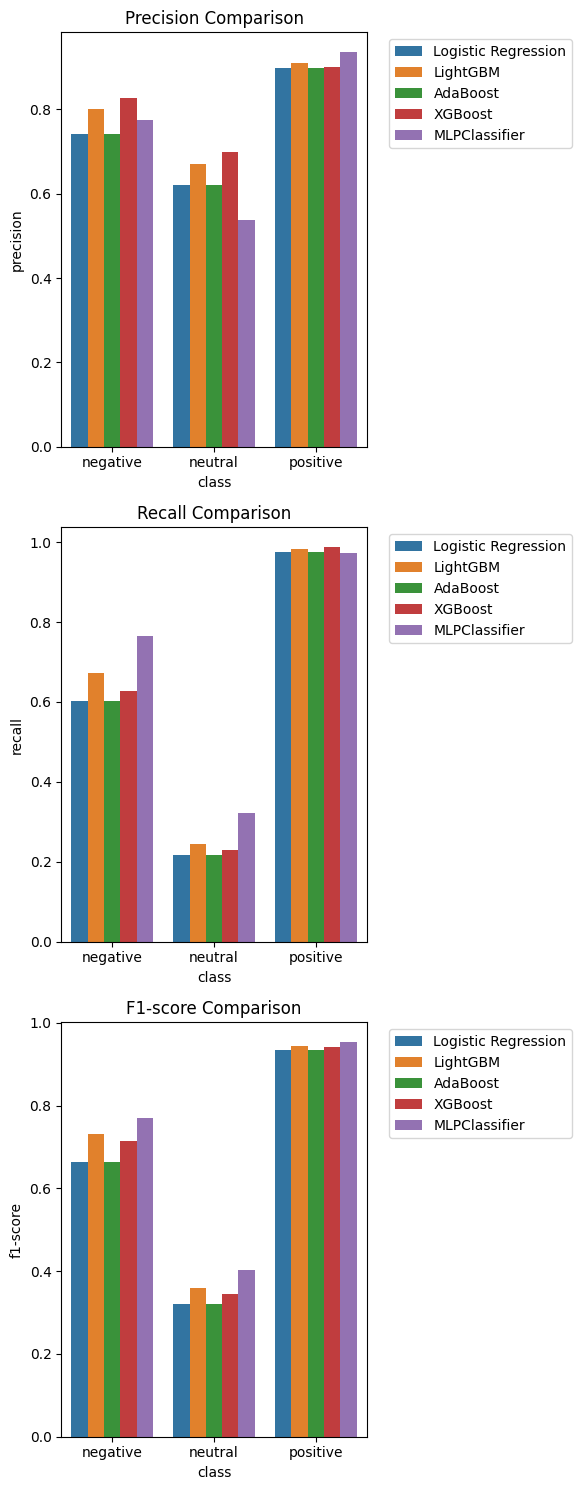

In [65]:
fig, axs = plt.subplots(3, 1, figsize=(6, 15))
for i, metric in enumerate(metrics):
    sns.barplot(x='class', y=metric, hue='model', data=combined_df, ax=axs[i])
    axs[i].set_title(f'{metric.capitalize()} Comparison')
    axs[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import pickle
vectorizer_filename = 'tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

In [ ]:
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {filename}")